In [1]:
from obspy.clients.fdsn import Client
from obspy import read, UTCDateTime
import numpy as np
import matplotlib.pyplot as plt

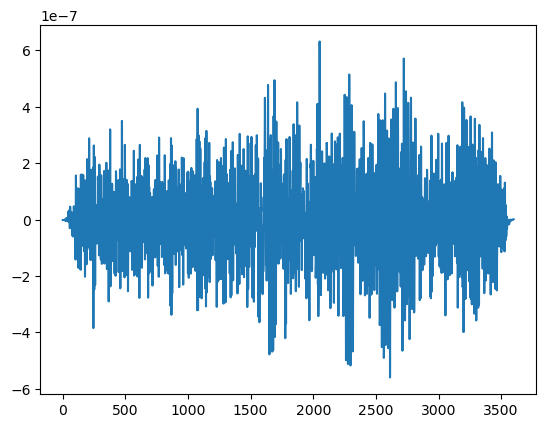

In [9]:
client = Client('IRIS')

network = 'II'
station = 'MBAR'
location = '*'
channel = 'BH*'
starttime = UTCDateTime('2023-06-18T00:00:00')
endtime = UTCDateTime('2023-06-18T01:00:00')

# stream = client.get_waveforms(network, station, location, channel, starttime, endtime)
stream = client.get_waveforms(network, station, location, channel, starttime, endtime, attach_response=True)
# print(network, station, location, channel, starttime, endtime)
# inv = client.get_stations(network, station, location, channel, starttime, endtime, level='response')
pre_filt = (0.005, 0.006, 30.0, 35.0) #Hz
# stream.plot()
# stream.remove_response(inventory=inv, output='DISP', pre_filt=pre_filt)
# stream.plot()
st_rem = stream.copy()
st_rem.detrend('linear')
st_rem.taper(type='cosine', max_percentage=0.05)
st_rem.remove_response(output='DISP', plot=False, pre_filt=pre_filt)


trace = st_rem.select(location = '00', component='Z')[0]
amplitudes = trace.data

t = np.linspace(0, 3600, amplitudes.size)

plt.plot (t, amplitudes)
plt.show ()

In [3]:
# Interpretation of the data
# How to get info on P, SH and SV waves?
# What's my most immediate task? -> Omkar
# What more do I need to learn before I can get conceptual?

In [4]:
# Saving data locally
filename = station + '_data'
stream.write(filename, format='mseed')

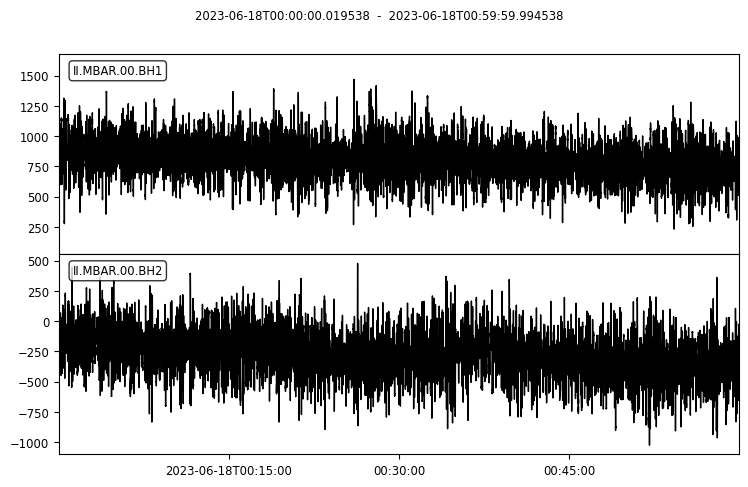

In [5]:
stream[0:2].plot();
stream[0:2].write(filename+'_cut', format='mseed')

In [6]:
# Python tutorial
import numpy as np
array = np.arange(0,10,.5).tolist()

# Numpy arrays are faster than python lists
print(array)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]


6 Trace(s) in Stream:
II.MBAR.00.BH1 | 2023-06-18T00:00:00.019538Z - 2023-06-18T00:59:59.994538Z | 40.0 Hz, 144000 samples
II.MBAR.00.BH2 | 2023-06-18T00:00:00.019538Z - 2023-06-18T00:59:59.994538Z | 40.0 Hz, 144000 samples
II.MBAR.00.BHZ | 2023-06-18T00:00:00.019538Z - 2023-06-18T00:59:59.994538Z | 40.0 Hz, 144000 samples
II.MBAR.10.BH1 | 2023-06-18T00:00:00.019538Z - 2023-06-18T00:59:59.994538Z | 40.0 Hz, 144000 samples
II.MBAR.10.BH2 | 2023-06-18T00:00:00.019538Z - 2023-06-18T00:59:59.994538Z | 40.0 Hz, 144000 samples
II.MBAR.10.BHZ | 2023-06-18T00:00:00.019536Z - 2023-06-18T00:59:59.994536Z | 40.0 Hz, 144000 samples


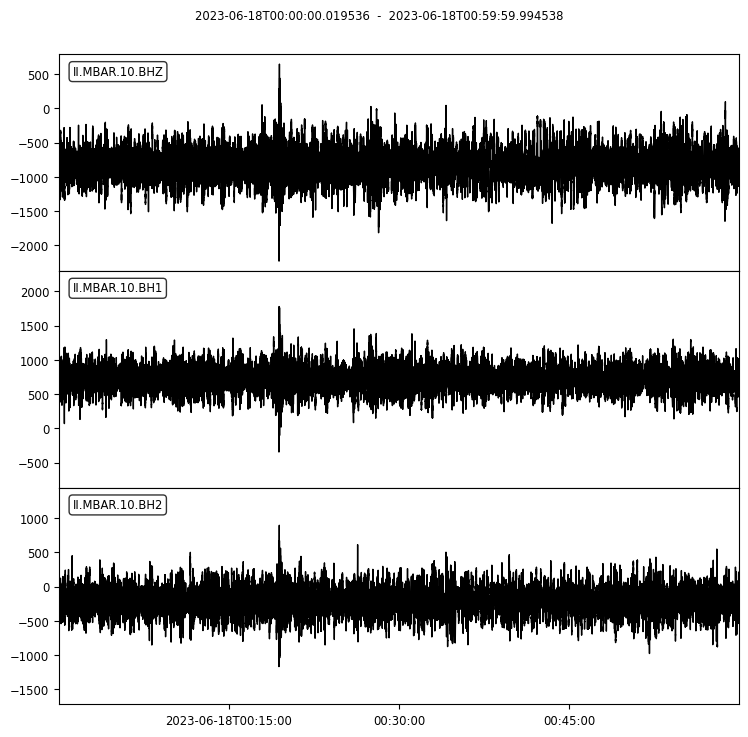

In [7]:
st = read('MBAR_data')
print(st)
st[-3:].plot();

c:\Users\18723\anaconda3\lib\site-packages\obspy\signal\filter.py:62: UserWarning: Selected high corner frequency (20.0) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


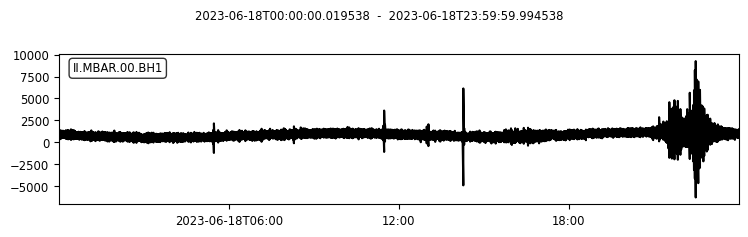

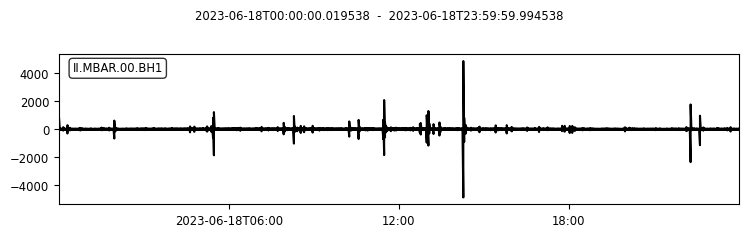

In [ ]:
# Stream and trace methods
st0 = st[0]
st_filt = st0.copy()
st_filt.filter('bandpass', freqmin=1.0, freqmax=20.0)

st0.plot()
st_filt.plot();

In [ ]:
print(st0.stats)

         network: II
         station: MBAR
        location: 00
         channel: BH1
       starttime: 2023-06-18T00:00:00.019538Z
         endtime: 2023-06-18T23:59:59.994538Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 3456000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 677, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 19623936})


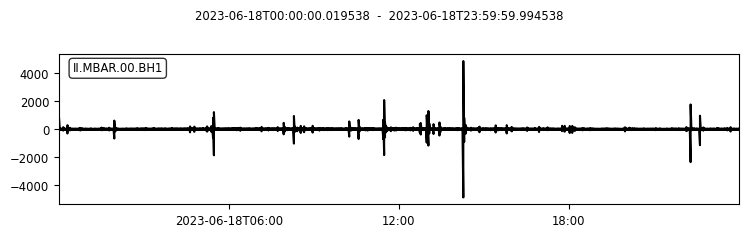

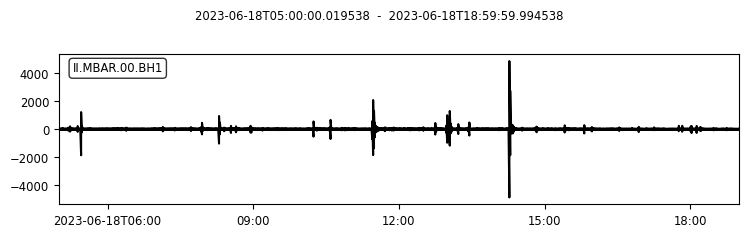

In [ ]:
starttime = st0.stats.starttime + 3600*5
endtime = st0.stats.endtime - 3600*5

st_trim = st_filt.copy()
st_trim.trim(starttime=starttime, endtime=endtime)

st_filt.plot()
st_trim.plot();

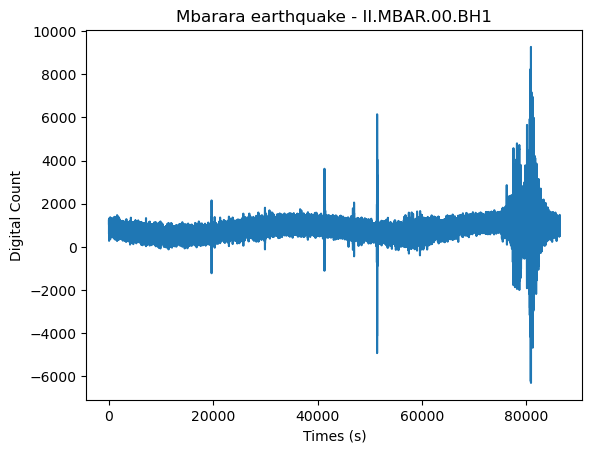

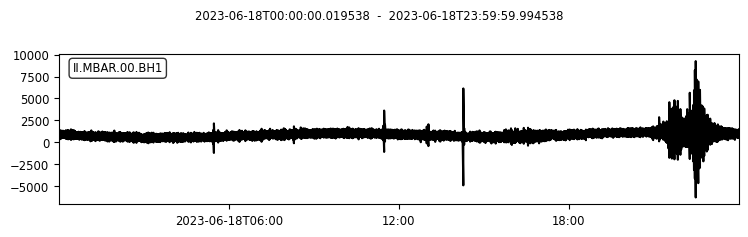

In [ ]:
data = st0.data
times = st0.times()
net = st0.stats.network
sta = st0.stats.station
loc = st0.stats.location
chan = st0.stats.channel
plt.plot(times, data)
plt.xlabel('Times (s)')
plt.ylabel('Digital Count')
plt.title("".join(['Mbarara earthquake - ', net, '.', sta, '.',\
                    loc, '.', chan]))
st0.plot();